<a href="https://colab.research.google.com/github/stat10/DS10-Case-Studies/blob/master/Finnish_Baby_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning outcomes of case study:
1. Students can understand graphs with time trends.
> appreciate potential loops in displaying time trend over truncated period.
2. Students can appreciate different ways of processing and analyzing the same data
> difference can be demonstrated based on difference or rate of change
2. Students demonstrate awareness of confounding factors when discussing a causal claim.
3. Students understands the usefulness of randomized experiment in drawing causal conclusions.
4. Students participate in a thoughtful discussion regarding evidence based policy making.

#Pre case reading


[(Independent)Two charts which explain why babies whould sleep in cardboard boxes](https://www.independent.co.uk/life-style/health-and-families/two-charts-which-explain-why-babies-should-sleep-in-cardboard-boxes-a6729331.html)

[(BBC)Why Finnish babies sleep in cardboard boxes](https://www.bbc.com/news/magazine-22751415)


# **Thinking outside the Box**
Do we want to copy the Finnish to save our babies?
![alt text](https://cdn.notonthehighstreet.com/fs/2f/64/1cd6-cc17-45aa-ac22-560b3706160f/original_luxury-baby-box.jpg)

# Infant mortality
Health is an important goal that we, as human being, strive towards. The 3rd [Sustainable Development Goal](https://sustainabledevelopment.un.org/sdg3) (previously Millenium Development Goal) is 
> *ensure healthy lives and promote well-being for all at all ages*.

Four important areas are highlighted under SDG3: 
*   Reproductive, maternal, newborn and child health;
*   Infectious diseases;
* Non-communicable diseases, mental health and environmental risks;
* Health systems and funding.

Maternal and child health is a complicated concept. Monitoring improvements in maternal and child health involves multiple indicators. One important indicator is infant mortality - the death of and infant before the age of 1. 

---

The infant mortality rate (in a region, within a fix time period) is defined as 

$$\frac{\text{Number of infant deaths before his or her first birthday}}{\text{1000 Live births}  }$$

---


## Infant mortality over the world


Let's consider the following questions. 

**Questions**
1. What are the top 10 richest countries in the world in 2015?
2. What are the top 10 countries with lowest infant mortality rate (IMR) in 2015? 

Do you think the answers to these questions are similar? Now, let's spend about 5 minutes to find a data source that can answer these questions. 


### [World Bank Open Data](https://data.worldbank.org/)

> Pause and vote: How would you describe the IMR numbers? 
> * Absolute truth
> * Measurements
> * Estimates

You might imagine that infant mortality numbers are measured based on recording number of infant deaths and number of births in a country-year, and calculated based on those numbers. 

However, such data is only available in countries with a good vital registry system. When agencies such as UNICEF and WHO wants to report on the situation in child mortality, they would like to give numbers for every country-year. Hence, a lot of effort has been put together to develop methods and models that integrates all available data (not just vital registry data) to provided reasonable estimates for every country in the world. The current numbers are provided by an [inter-agency group](https://childmortality.org/) led by UNICEF that closely monitors and reports child mortality across the world. The specific details of the model is beyond our discussion.

However, we should be aware of the fact that the numbers we get from the world bank database are estimated from a model. Knowing the details of where our data came from allows us to be mindful of sources of bias and error.

Now that we have a dataset, we can go back to where we started from. What is the relationship between infant mortality rate, and country's average income?

Let's play around with this dataset in the [Gapminder tool](https://tinyurl.com/tkzrfsd).  

Playing around with the data, we observe the following facts:
1. In 2015, we observe a negative relationship between the average income of a country, and its infant mortality rate. 
2. We observe that United States has an infant mortality rate that is high for our average income level. 
3. For many countries, the negative relationship is consistent over time. Infant mortality rate decreases as average income increases. 



Let's focus on the United States. It turns out, many states in the US are aware of the problem on infant mortality and are doing something about it! 

# Tackling infant mortality in United States
![alt text](https://cdn1.imggmi.com/uploads/2019/12/2/55702e2cb1e1740000cd25fc49d30c2b-full.png)

[New Jersey](https://www.cnn.com/2017/01/26/health/new-jersey-baby-boxes-safe-sleep/index.html) [Ohio](https://www.cleveland.com/metro/2017/03/free_baby_boxes_offered_to_ohi.html) [Alabama](https://whnt.com/2017/03/27/alabama-initiates-statewide-baby-box-program/) [California](https://sacramento.cbslocal.com/2018/03/07/baby-box-sleeping-infant/)

## Interactive discussion with student
You have all read about this Finnish baby boxes. What do you think of the baby boxes? 


Potential answers

* Finland has lowest imr - must be doing something right
* imr in Finland has been decreasing 

# Infant mortality in Finland
## Trends in infant mortality
One piece of evidence that appeared in both articles is the following graph of infant mortality in Finland. It demonstrates that since the introduction of the baby box program in 1938, Finland's infant mortality rate has been falling. 

![alt text](https://ichef.bbci.co.uk/news/624/media/images/67954000/gif/_67954690_infant_mortality_464_2.gif)

**Discussion Question** What comes to your mind when you look at this graph? 
Do a think-pair-share and discuss as a class.

Let's try to reproduce this graph. We can get the original dataset from [Statistics Finland](https://findikaattori.fi/en/45#_ga=2.191680490.1742356036.1576481773-110359197.1572887718). 

In [0]:
#@title Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#@title Load the Finland infant mortality data
finland_imr_url = 'https://github.com/sanqian-zhang/DS10FinnishBabyBox/raw/master/imevaiskuolleisuus.xls'
finland_imr = pd.read_excel(finland_imr_url, sheet_name=0, skiprows=2, decimal=',')
# Naming the columns appropriately and removing rows 
finland_imr.columns = ['year', 'IMR']
finland_imr = finland_imr.dropna().copy()
finland_imr['year'] = finland_imr.year.astype('float32')

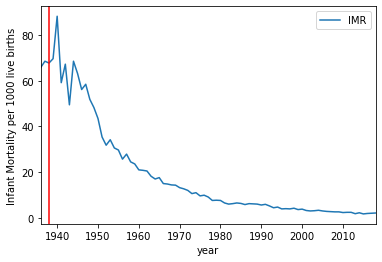

In [0]:
#@title Reproducting graph of Infant Mortality in Finland 
starting_year = 1935 #@param {type:"slider", min:1751, max:1935, step:1}
finland_imr[finland_imr.year > starting_year].plot.line(x='year', y='IMR')
plt.axvline(x=1938, color='r')

#some historical events in Finland
#plt.axvline(x=1808, color='g') # finnish war
#plt.axvline(x=1866, color='g') # finnish famine, 1866 - 1868
#plt.axvline(x=1918, color='g') # ww1 period + spanish flu
#plt.axvline(x=1939, color='g') # various wars, including ww2

plt.ylabel('Infant Mortality per 1000 live births')
plt.show()

One misleading aspect of the graph presented in the articles is that it started the graph in 1935. After changing the starting year of the graph, we make the following observations: 
> * The overall trend in IMR is decreasing over time. The decrease started long before 1930s-1940s. When we examine the entire graph, we cannot claim that the decrease started after the implementation of the Baby Box program. 
> * There are a lot of fluctuations in IMR from year to year: 
>> - some of the fluctuations correspond to historical events such as war or famine.
>> - fluctuations tend to be higher in the past in the past.  

## More analysis based on the time series

We observe that the downward trend in IMR started way before the baby box program started. However, does that imply that nothing changed about the IMR in Finland from 1940s? 

Let's take a closer look at the data. 

### 1. Addressing fluctuations in the data. 
One aspect we highlighted about the data is that the fluctuation in data is much higher in the past (when the value of IMR is higher). At more recent times, the fluctuations are getting smaller. What are possible reasons? 

One, of course, is that we can argue that data quality is improving over time. However, more fundamentally, we might expect that this is due to multiplicative error in the data. 

When we encounter non-negative quantities like rate or prices (income), it is more reasonable when we think of errors in relative scale. Think about price, a \\$10 discount on a \\$100 dollar item gives a 10% reduction in price, while a \\$10 discount on a \\$1000 dollar item gives a 1% reduction in price. It doesn't make sense to consider the \\$10 dollar difference to have the same impact on the \\$100 dollar item and the \\$1000 item. Similarly, when we look at error in our data that is non-negative, the amount of distortion caused by an error of magnitude 1 has different impact when the true quantity is 1 or 10 or 100. Hence, it would be much more sensible to consider error on a relative scale. 

How do we incorporate the idea of such multiplicative error? One common tool is taking the $\log$ transformation. It doesn't matter which base we use - typically we use the natural $\log$. Why does the $\log$ transformation work? 

Suppose the true value of the data is $x$, and our measured value is $0.99x$. The error in measurement is $0.01x$ which changes depending on the value of $x$. However, if we consider the log-transformation, the logged-true value is $\log(x)$. The logged-measured value is $\log(0.99x)$. By properties of the log, 
$$
\log(ab) = \log(a) + \log(b),
$$ this quantity is $\log(0.99)+\log(x)$. Hence, the error on log-scale is $-\log(0.99)$. This error doesn't depend on the value of $x$. 
 

Text(0, 0.5, 'Log( Infant Mortality Rate )')

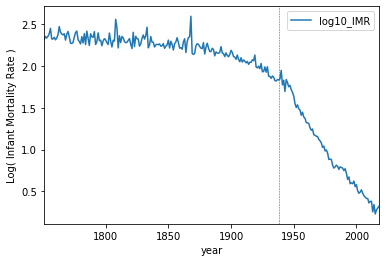

In [0]:
#@title Getting log-transformed data
finland_imr['log10_IMR'] = np.log10(finland_imr.IMR)
finland_imr.plot.line(x='year', y='log10_IMR')
plt.axvline(x=1938, color='r', lw=0.5, ls = '--')
plt.ylabel('Log( Infant Mortality Rate )')

After log-transformation, we get a clearer picture of the trend. Indeed the data has been consistently decreasing. However, the speed of change seems different before and after the baby box program.

To take a closer look, I took the data before 1935, and the data after 1940, and fitted seperate $\texttt{lowess}$ curves to each data series. Lo(cally) we(ighted) s(catterplot) s(moothing) is one way to understand trend in the data without making explicit assumptions about the shape of the trend. The $\texttt{frac}$ parameter in the function controls the smoothness of the resulting line. Play around with the parameter to see what happens to the fitted trend lines. 

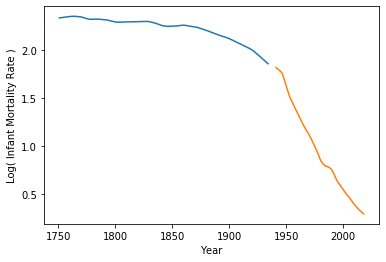

In [0]:
#@title Fitting a lowess
frac_in_lowess = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}
from statsmodels.nonparametric.smoothers_lowess import lowess
y_smooth_before = lowess(finland_imr.log10_IMR[finland_imr.year < 1935],
            finland_imr.year[finland_imr.year < 1935],
            is_sorted=True,
            frac=frac_in_lowess)
y_smooth_after = lowess(finland_imr.log10_IMR[finland_imr.year > 1940],
            finland_imr.year[finland_imr.year > 1940],
            is_sorted=True,
            frac=frac_in_lowess)
plt.plot(finland_imr.year[finland_imr.year < 1935], y_smooth_before[:,1])
plt.plot(finland_imr.year[finland_imr.year > 1940], y_smooth_after[:,1])
plt.ylabel('Log( Infant Mortality Rate )')
plt.xlabel('Year')
plt.show()

In [0]:
## simulate constant percentage reduction 

T = 100
time_seq = np.linspace(start=1, stop=T, num=T) - 1
log_imr_t0 = 2.5
#rate_of_reduction=0.2
#log_imr = time_seq * np.log(rate_of_reduction) + log_imr_t0 

NameError: ignored

In [0]:
log_imr_r2 = time_seq * np.log(0.2) + log_imr_t0 
log_imr_r8 = time_seq * np.log(0.8) + log_imr_t0 

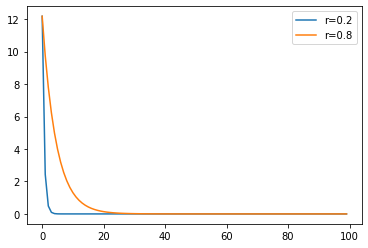

In [0]:
plt.plot(np.exp(log_imr_r2))
plt.plot(np.exp(log_imr_r8))
plt.legend(['r=0.2', 'r=0.8'])

### 2. Analyzing the rate of change
We observe that the fitted trend lines look very different before and after the baby box program. From the trend lines, it seems that there is a change in rate of change. If we were given a smooth trend line as a function of $t$, we would have been analyzing the 2nd order derivative. However, the data is much more noisy that any smooth function of $t$. How can we examine this difference? 

One trick is to analyze the $k$-year lagged difference. That is, we look at the observation in year $t$, $y_t$ and compare it against $y_{t-k}$ for some value of $k$. 

In [0]:
#@title Lagged difference in IMR
k_lag = 1 #@param {type:"slider", min:1, max:20, step:1}
plt.plot(finland_imr.year, finland_imr.log10_IMR.diff(periods=k_lag))
average_diff_before = np.mean(finland_imr.log10_IMR.diff(periods=k_lag)[finland_imr.year < 1935])
plt.axhline(y=average_diff_before, color='black', lw=0.5, ls='--')
average_diff_after = np.mean(finland_imr.log10_IMR.diff(periods=k_lag)[finland_imr.year > 1940])
plt.axhline(y=average_diff_after, color='orange', lw=1, ls='--')
plt.axvline(x=1938, color='r', lw=0.5, ls='--')

NameError: ignored

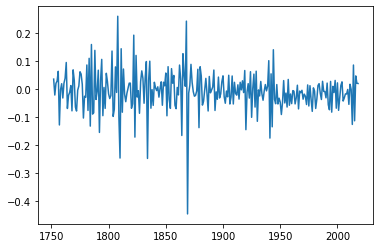

In [0]:
plt.plot(finland_imr.year, finland_imr.log10_IMR.diff(periods=1))

From the graph, we can see that the average of $k$-lagged difference is lower after 1940 than before 1935. 

# Pause and reflection
Think about what we did so far. What analysis did we do? What did you learn? What is your perspective on effectiveness of the Finnish baby box? 

Talk to your neighbour about this. 

# What do the Finnish think? 

States in the US were not the only governments to take an interest in the Finnish baby boxes. In 2017, Scotland decided to [issue baby boxes](https://www.mygov.scot/baby-box/) too. And here is how the [ Finnish responded:](https://www.theguardian.com/society/2018/may/03/finland-disputes-scotlands-baby-box-claims-after-expert-warning)

>> “We don’t want to promote the idea that there is evidence the baby box as such has decreased infant mortality in Finland or that Finland has made such claims. Rather, it has been the improving of our healthcare system of which the baby box is a part of, that our low infant mortality can be attributed to,” a Kela spokesperson said.

>> “Empirical data on the effect of the maternity package on infant mortality does not exist.”


# What happened in Finland in 1940s? 
* The original [baby box program](https://blogi.thl.fi/finlands-low-infant-mortality-has-multiple-contributing-factors/)
> It was a means by which pregnant women were encouraged to use maternity welfare services, and mothers gained access to public health care services. Mothers were also encouraged through family policy to look after their own and their child’s health.
 


Given the context, consider the following claim:
* Trends in Finland's infant mortality rate changed since 1940. 
* The baby box program was implemented between 1938 - 1940.
* Hence, the baby box program changed trends in Finland's infant mortality rate. 

To what extent do you agree with the claims above? 


>> The occurrence of an effect after an event doesn't imply causal impact of an event. Maybe the effect would have happened regardless of the event (time trend). Maybe the effect is caused by other events that we didn't observe. 

Consider two more questions:
* Did the baby box program change the trends in Finland's infant mortality rate?
* Did the use of baby box change the trends in Finland's infant mortality rate?

How do the answer to these two questions differ? 

>> Program itself having an effect doesn't tell us which part of the program was effective. 

## Policy impact evaluation
It seems that we cannot answer the question whether baby boxes are effective in reducing infant mortality cleanly. 
If you can go back to 1938 in Finland - how would you establish empirical evidence on whether the the baby box program worked? 


Here are some guiding questions to go through.
1. Did the baby box program work?
2. If the baby box program worked, what was the mechanism by which it worked? 
> * Did it work because of improving pre-natal care?
> * Did it work because of pre-natal education?
> * Did it work because of letting babies sleeping in baby boxes?
> * Did it work because of better benefits (goods given)?

Things to discuss
- Use RCT to determine effect
- Need to distinguish between effect of the program overall vs which is the element that was effective 

## Generalizing results 

Suppose the baby box program worked in Finland - how do we know it would work in the US? 

* Depend on mechanism and context 
* Need to be careful about generalization of result

# Last part
Say you are the mayor of washington DC - one of the states in US with high IMR. Your consultants suggested that you can try to roll out the baby box program. What would you do? 

# Homework 
Idea for homework: focus on dissecting causal claims: 
Here is a [review](https://www.glamour.com/story/curology-review) of a skincare product. Identify the causal claim(s) made in the review and discuss potential confounding factors. 
How would you establish a valid causal claim on this individual? To what extent is this result generalizable? 